# Code to produce figure 4, 5a, 7, and 8a

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scr
from scr import analytic, bie

%matplotlib inline

## Internal plotting functions

In [2]:
def calc_err(result, u_ana, u_max):
    return np.abs(result[0] - u_ana).max() / u_max

In [3]:
def plot_err(param):
    α = param["α"]
    k = param["k"]

    type_wave = param["type_wave"]
    m = param["m"]

    ε_vec = param["ε_vec"]
    nb_ε = np.size(ε_vec, 0)

    N = param["N"]

    err = np.zeros((nb_ε, len(param["solvers"])))

    for s, solver in enumerate(param["solvers"]):

        for i, ε in enumerate(ε_vec):
            E = scr.Ellipse(ε)
            c, ξ0 = analytic.ellipse_param(1, ε)

            if type_wave.startswith("ful"):
                in_field = analytic.field_plane_wave(ε, c, α, k, m)

            if type_wave.startswith("eve"):
                in_field = analytic.create_field(
                    ε, c, k, [[(m, 1)], [], [], []], [[], [], [], []]
                )

            if type_wave.startswith("odd"):
                in_field = analytic.create_field(
                    ε, c, k, [[], [], [], []], [[(m, 1)], [], [], []]
                )

            sc_field = analytic.solve_field(in_field, ξ0, param["p"])

            θ, _ = bie.grid(N)
            u_ana = param["trace_ana"](in_field)(θ) + param["trace_ana"](sc_field)(θ)
            u_max = np.abs(u_ana).max()

            err[i, s] = calc_err(
                solver(E, k, param["trace_input"][s](in_field), N), u_ana, u_max
            )

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    marker_vec = ("o", "P", "X")
    for n, leg in enumerate(param["legends"]):
        ax.loglog(ε_vec, err[:, n], f"{marker_vec[n]}--", label=leg)

    if param["slope"][0]:
        ε_ = np.array([1e-8, 1e-3])
        ax.loglog(ε_, 10 ** (-0.5) * ε_, "k", label=r"$\mathcal{O}(\varepsilon)$")

    if param["slope"][1]:
        ε_ = np.array([1e-7, 1e-3])
        ax.loglog(ε_, ε_ ** 2, "k--", label=r"$\mathcal{O}(\varepsilon^2)$")

    ax.set_xlim(*param["xlim"])
    ax.set_xlabel(r"$\varepsilon$", fontsize=15)
    ax.set_ylim(*param["ylim"])
    ax.set_ylabel("relative error", fontsize=15)
    ax.grid(True)
    ax.legend(fontsize=15)

    ax.minorticks_off()

    return None


def plot_neumann(α, k, N, ε_vec, type_wave, m, slope):
    plot_err(
        {
            "type_wave": type_wave,
            "m": m,
            "α": α,
            "k": k,
            "ε_vec": ε_vec,
            "N": N,
            "trace_ana": scr.trace,
            "p": 1,
            "solvers": (
                bie.helmholtz_neumann_pqr,
                bie.helmholtz_neumann_mpqr,
                bie.helmholtz_neumann_qpax,
            ),
            "trace_input": (scr.trace, scr.trace, scr.trace_neumann_expansion),
            "legends": ("PQR", "MPQR", "QPAX"),
            "slope": slope,
            "xlim": (1e-8 / 10 ** 0.5, 1 * 10 ** 0.5),
            "ylim": (1e-17, 10),
        }
    )
    return None


def plot_dirichlet(α, k, N, ε_vec, type_wave, m, slope):
    plot_err(
        {
            "type_wave": type_wave,
            "m": m,
            "α": α,
            "k": k,
            "ε_vec": ε_vec,
            "N": N,
            "trace_ana": scr.scaled_normal_trace,
            "p": 0,
            "solvers": (
                bie.helmholtz_dirichlet_pqr,
                bie.helmholtz_dirichlet_mpqr,
                bie.helmholtz_dirichlet_qpax,
            ),
            "trace_input": (
                scr.scaled_normal_trace,
                scr.scaled_normal_trace,
                scr.trace_dirichlet_expansion,
            ),
            "legends": ("PQR", "MPQR", "QPAX"),
            "slope": slope,
            "xlim": (1e-8 / 10 ** 0.5, 1 * 10 ** 0.5),
            "ylim": (1e-16 / 10, 10),
        }
    )
    return None

## Parameters

In [4]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave

In [5]:
## Discretization parameters
N = 64  # Number of quadrature points

nb_ε = 16  # Number of ε
ε_min, ε_max = 1e-8, 0.9  # Limits for ε
ε_vec = np.geomspace(ε_min, ε_max, num=nb_ε)

## Neuman boundary condition

### Relative error for even solution

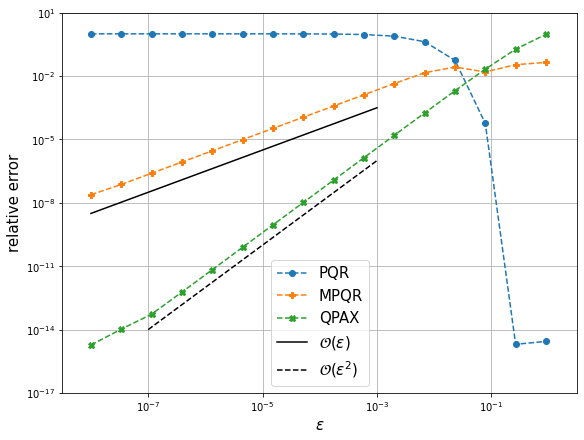

In [6]:
plot_neumann(α, k, N, ε_vec, "even", 3, (True, True))

### Relative error for odd solution

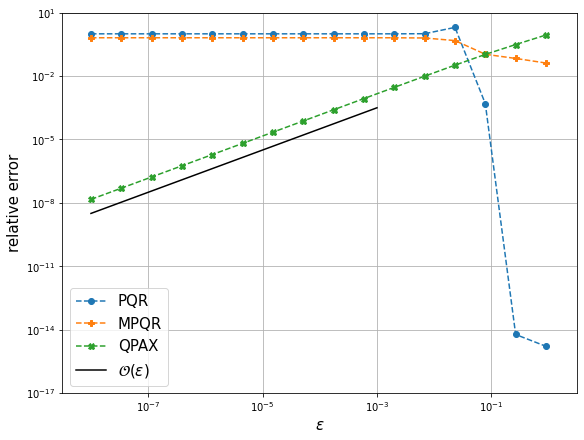

In [7]:
plot_neumann(α, k, N, ε_vec, "odd", 2, (True, False))

### Relative error for the full wave

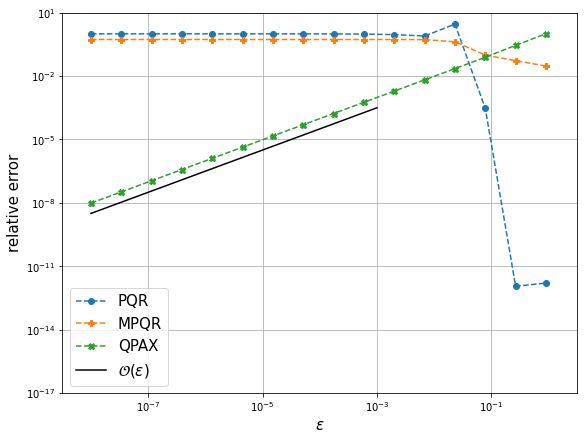

In [8]:
plot_neumann(α, k, N, ε_vec, "full", 15, (True, False))

## Dirichlet boundary condition

### Relative error for even solution

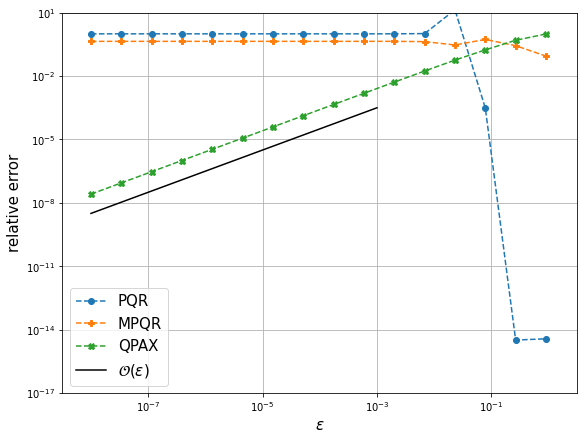

In [9]:
plot_dirichlet(α, k, N, ε_vec, "even", 3, (True, False))

### Relative error for odd solution

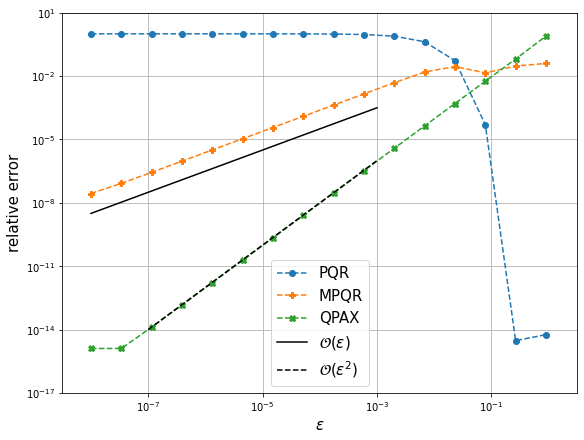

In [10]:
plot_dirichlet(α, k, N, ε_vec, "odd", 2, (True, True))

### Relative error for the full wave

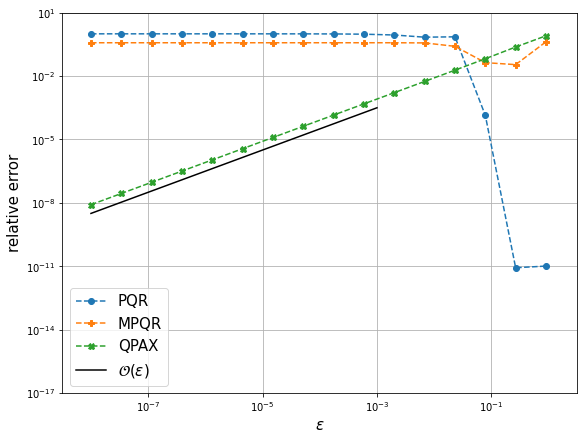

In [11]:
plot_dirichlet(α, k, N, ε_vec, "full", 15, (True, False))